In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("../Dataset/CSV-Train/10_1.csv",index_col="Reg_No")
data.shape

(1769, 116)

In [3]:
data.describe()

,Scheme_2015,Scheme_2019,Dept_CSE,Dept_Civil,Dept_ECE,Dept_EEE,Dept_IT,Dept_MECH,S1_D_BE10101,S1_D_BE10102,...,S1_S_grade,S1_E_grade,S1_A_grade,S2_C_grade,S2_D_grade,S2_E_grade,S2_T_grade,S2_A_grade,S2_B_grade,S2_S_grade
count,1769.000000,1769.000000,1769.000000,1769.000000,1769.000000,1769.000000,1769.000000,1769.000000,1769.000000,1769.000000,...,1769.000000,1769.000000,1769.000000,1769.000000,1769.000000,1769.000000,1769.000000,1769.000000,1769.000000,1769.000000
mean,0.722442,0.277558,0.295082,0.139627,0.150933,0.080837,0.076880,0.256642,0.106840,0.198982,...,8.086490,2.594121,3.493499,3.410401,4.413793,2.422838,7.363482,3.735444,3.634822,7.972301
std,0.447921,0.447921,0.456209,0.346698,0.358085,0.272661,0.266476,0.436904,0.308997,0.399348,...,1.369052,2.258791,2.912970,2.766768,2.349437,2.131921,1.617089,2.801925,2.712058,1.396028
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.000000,1.000000,0.000000,1.000000,3.000000,1.000000,6.000000,1.000000,1.000000,7.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.000000,2.000000,3.000000,3.000000,5.000000,2.000000,8.000000,3.000000,3.000000,9.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,9.000000,4.000000,6.000000,5.000000,6.000000,4.000000,9.000000,6.000000,6.000000,9.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [4]:
grade_col = [col for col in data.columns if col.endswith("grade")]
X = data.drop(grade_col, axis=1)
y = data[grade_col]
X.shape,y.shape

((1769, 101), (1769, 15))

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1326, 101), (443, 101), (1326, 15), (443, 15))

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,precision_score,accuracy_score,recall_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn import tree

In [40]:
from matplotlib import pyplot as plt

In [41]:
for slot in y_train.columns:
	print('=========',slot,'=========')
	print(y_train[slot].value_counts())

========= S1_D_grade =========
0.0    327
3.0    191
2.0    169
5.0    150
1.0    145
4.0    129
6.0     77
7.0     62
8.0     39
9.0     37
Name: S1_D_grade, dtype: int64
========= S2_F_grade =========
5.0    234
4.0    203
3.0    183
2.0    159
6.0    148
0.0    109
7.0    107
8.0     75
1.0     74
9.0     34
Name: S2_F_grade, dtype: int64
========= S1_C_grade =========
0.0    500
3.0    149
4.0    128
5.0    120
2.0    113
1.0    104
6.0     58
7.0     55
9.0     52
8.0     47
Name: S1_C_grade, dtype: int64
========= S1_T_grade =========
9.0    407
8.0    282
7.0    255
6.0    188
5.0    119
4.0     45
3.0     14
1.0      6
0.0      5
2.0      5
Name: S1_T_grade, dtype: int64
========= S1_B_grade =========
0.0    246
3.0    171
5.0    170
2.0    169
1.0    135
4.0    131
7.0     86
6.0     78
8.0     75
9.0     65
Name: S1_B_grade, dtype: int64
========= S1_S_grade =========
9.0    741
8.0    261
7.0    174
6.0     75
5.0     40
4.0     17
3.0      9
1.0      6
2.0      3
Name: S1_S

In [38]:
dct=DecisionTreeClassifier(random_state=0)
gsv=GridSearchCV(dct,param_grid={
    'criterion':["gini", "entropy", "log_loss"],
    # 'max_depth':[30,20],
    'min_samples_split':[2],
    'min_samples_leaf':[2],
    'max_features':['sqrt','log2']
},scoring='f1_weighted',n_jobs=-1,verbose=3,return_train_score=True)

========= S1_D_grade =========
Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy	= 0.23702031602708803
Precision	= 0.16838763562998824
F1 score	= 0.1617867040495911
Recall	= 0.23702031602708803
========= S2_F_grade =========
Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'criterion': 'gini', 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy	= 0.19187358916478556
Precision	= 0.18848599903195346
F1 score	= 0.1702845739685445
Recall	= 0.19187358916478556
========= S1_C_grade =========
Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy	= 0.3431151241534989
Precision	= 0.18246918560351394
F1 score	= 0.17899345102860695
Recall	= 0.3431151241534989
========= S1_T_grade =========
Fitting 5 folds for each of 6 candidates, totalling 

d:\Programming\LBS BTech\Main project\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy	= 0.23702031602708803
Precision	= 0.21697545416435968
F1 score	= 0.20230676121699737
Recall	= 0.23702031602708803
========= S1_S_grade =========
Fitting 5 folds for each of 6 candidates, totalling 30 fits


d:\Programming\LBS BTech\Main project\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


{'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy	= 0.5733634311512416
Precision	= 0.21654271320697577
F1 score	= 0.2212917337573752
Recall	= 0.5733634311512416
========= S1_E_grade =========
Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy	= 0.42437923250564336
Precision	= 0.28076488842730873
F1 score	= 0.26954940957977525
Recall	= 0.42437923250564336
========= S1_A_grade =========
Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy	= 0.23024830699774265
Precision	= 0.2197624635793758
F1 score	= 0.19727148836988392
Recall	= 0.23024830699774265
========= S2_C_grade =========
Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_sam

d:\Programming\LBS BTech\Main project\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


{'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy	= 0.6297968397291196
Precision	= 0.441280300573887
F1 score	= 0.45224018496651197
Recall	= 0.6297968397291196
========= S2_A_grade =========
Fitting 5 folds for each of 6 candidates, totalling 30 fits


d:\Programming\LBS BTech\Main project\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy	= 0.18961625282167044
Precision	= 0.18492029835641607
F1 score	= 0.17342764907275038
Recall	= 0.18961625282167044
========= S2_B_grade =========
Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy	= 0.2144469525959368
Precision	= 0.20371476930892762
F1 score	= 0.19480884397232656
Recall	= 0.2144469525959368
========= S2_S_grade =========
Fitting 5 folds for each of 6 candidates, totalling 30 fits


d:\Programming\LBS BTech\Main project\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


{'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy	= 0.7426636568848759
Precision	= 0.3327505277501542
F1 score	= 0.3218874597011482
Recall	= 0.7426636568848759


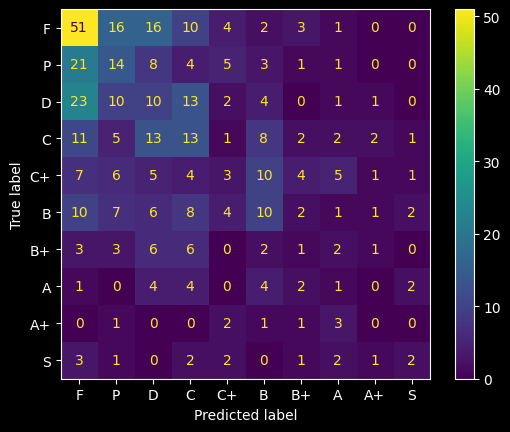

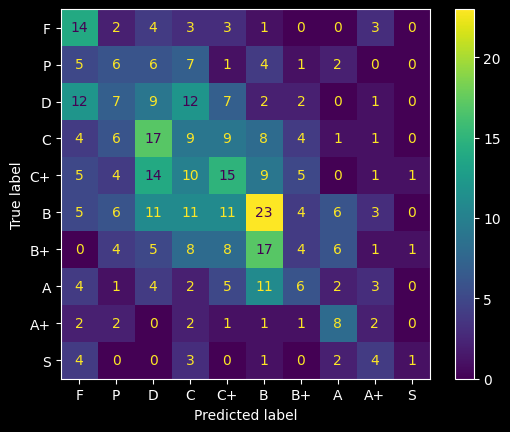

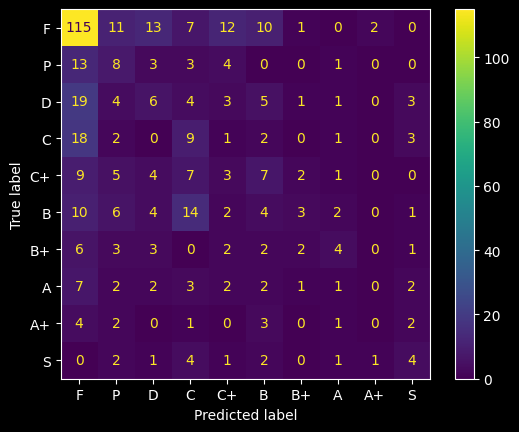

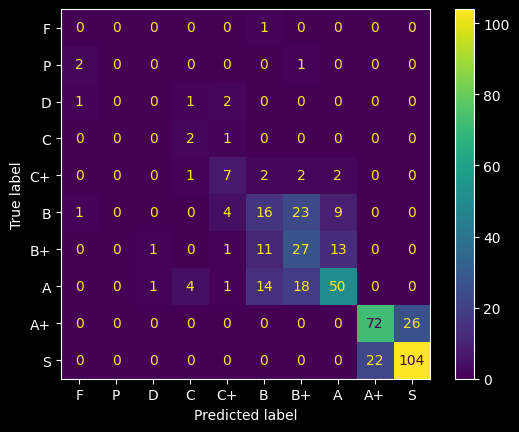

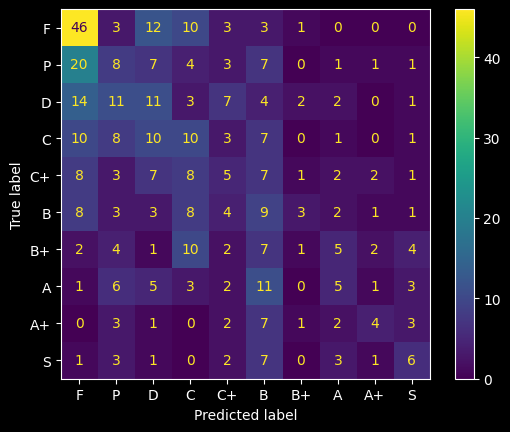

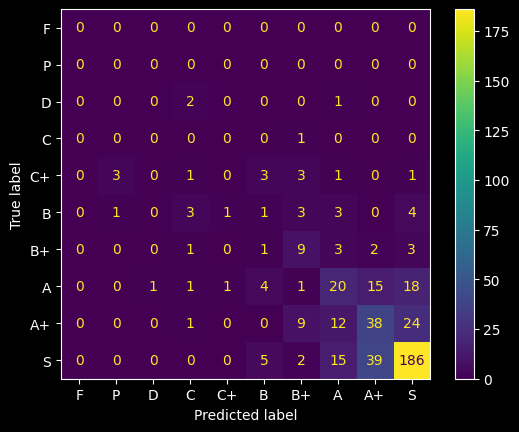

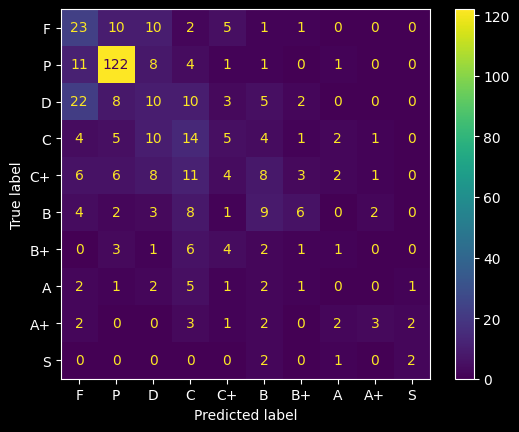

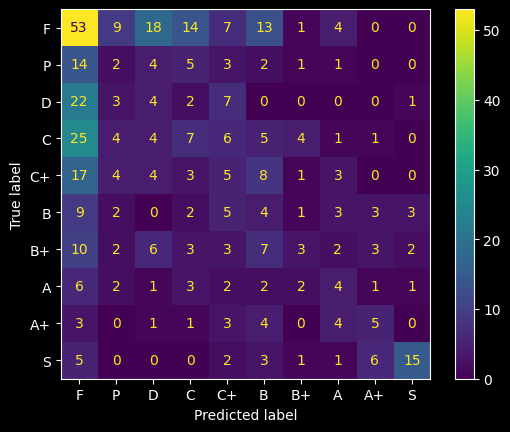

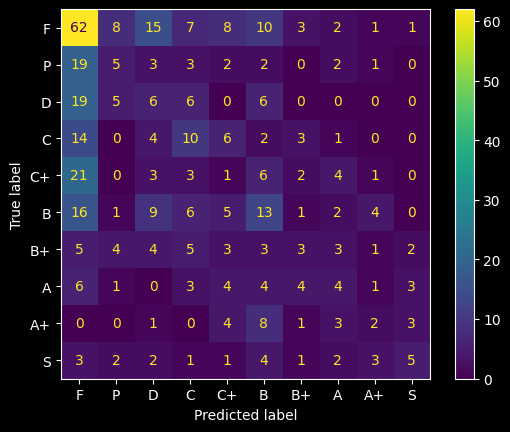

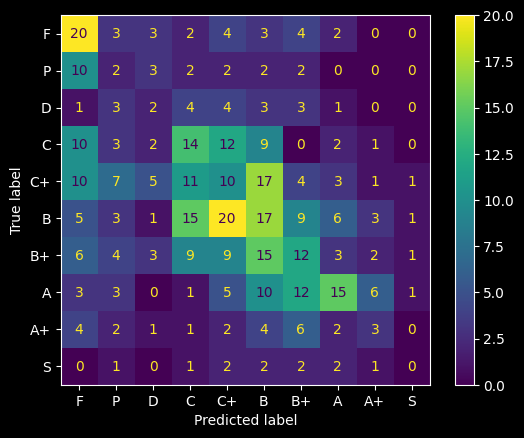

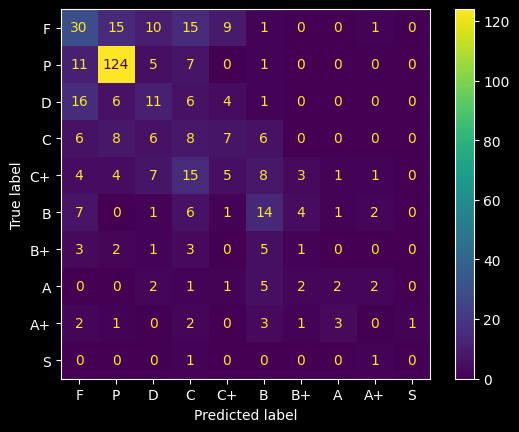

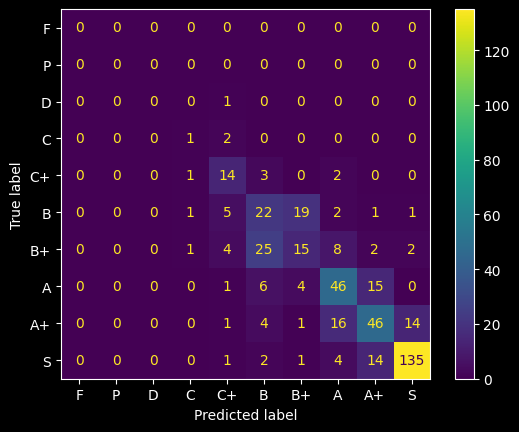

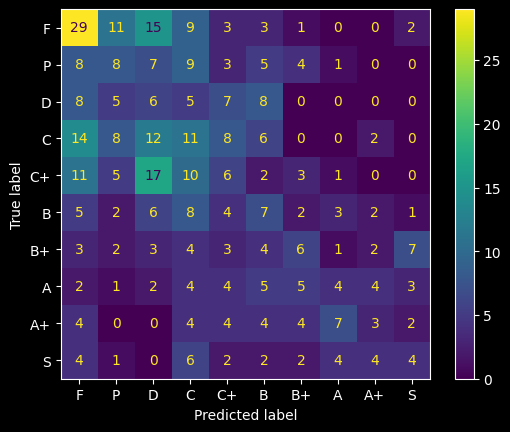

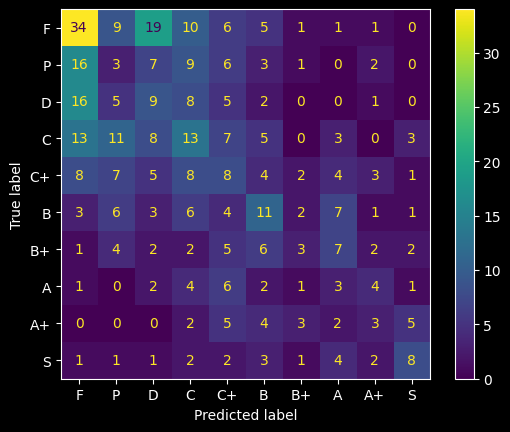

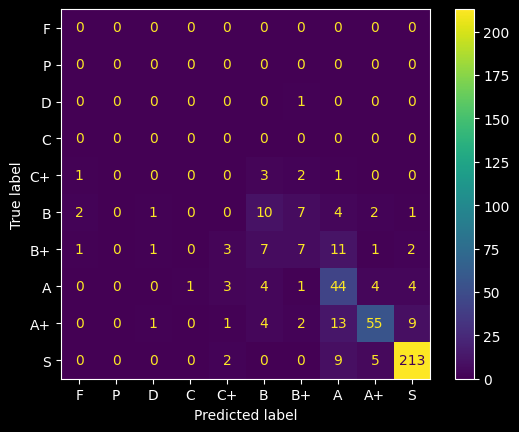

In [39]:
for slot in y_train.columns:
	print('=========',slot,'=========')

	gsv.fit(X_train,y_train[slot])

	y_true=y_test[slot]
	y_pred=gsv.predict(X_test)

	# y_true=y_train[slot]
	# y_pred=gsv.predict(X_train)

	cm=confusion_matrix(y_true,y_pred,labels=[0,1,2,3,4,5,6,7,8,9])
	print(gsv.best_params_)
	
	print('Accuracy\t=',accuracy_score(y_true,y_pred))
	print('Precision\t=',precision_score(y_true,y_pred,average='macro'))
	print('F1 score\t=',f1_score(y_true,y_pred,average='macro'))
	print('Recall\t=',recall_score(y_true,y_pred,average='micro'))
	
	ConfusionMatrixDisplay(cm,display_labels=['F','P','D','C','C+','B','B+','A','A+','S']).plot()
	# break

<function matplotlib.pyplot.show(close=None, block=None)>

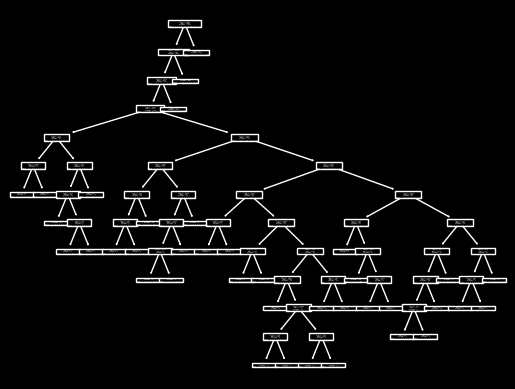

In [37]:
tree.plot_tree(gsv.best_estimator_)
plt.show
